Ejercicio
Scikit Learn no solo provee algunos datasets populares. También incluye toy datasets, los cuales son datasets para comprobar las particularidades de distintos modelos.

    Estudie el toy dataset Make Moons disponible en scikit learn aquí
    Genere un dataset con 1000 muestras y ruido (noise) 0.05
Utilice los distintos algoritmos de clustering para identificar agrupaciones de datos. Utilice matplotlib para mostrar gráficamente cuál de ellos se ajusta mejor.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import sklearn.datasets

In [7]:
data=sklearn.datasets.make_moons(n_samples=1000,noise=0.05)
data

(array([[-0.83383383,  0.32855341],
        [ 0.9782726 ,  0.2438082 ],
        [ 0.92537731,  0.40644032],
        ...,
        [ 1.93401197,  0.47328254],
        [-0.96971079,  0.47921876],
        [ 1.55734625, -0.35177252]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 

In [22]:
X,y=data

In [23]:
X

array([[-0.83383383,  0.32855341],
       [ 0.9782726 ,  0.2438082 ],
       [ 0.92537731,  0.40644032],
       ...,
       [ 1.93401197,  0.47328254],
       [-0.96971079,  0.47921876],
       [ 1.55734625, -0.35177252]])

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,

In [25]:
df=pd.DataFrame(X)

In [26]:
df

,0,1
0,-0.833834,0.328553
1,0.978273,0.243808
2,0.925377,0.406440
3,-0.028002,0.953582
4,-0.279317,0.962457
...,...,...
995,1.382207,-0.484946
996,1.562651,-0.322820
997,1.934012,0.473283
998,-0.969711,0.479219


In [27]:
df.columns=['One','Two']

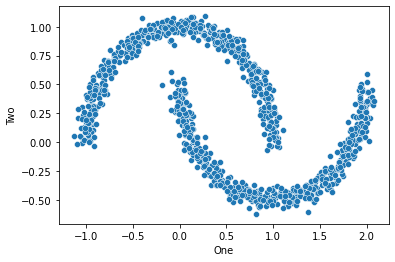

In [29]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(data=df,y='Two',x='One')


generando los clusters

In [30]:
# Instanciar escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(X)

Kmeans

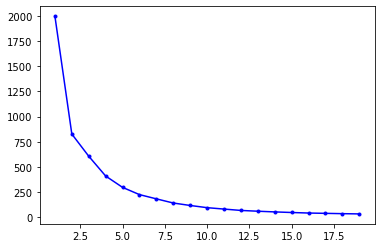

In [31]:
score = []
k_clusters = range(1,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    score.append(-kmeans.score(scaled_df))
    

plt.plot(k_clusters, score,'b.-')

In [83]:
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_df)

y_pred = kmeans.predict(scaled_df)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,

Text(0.5, 0, 'Age')

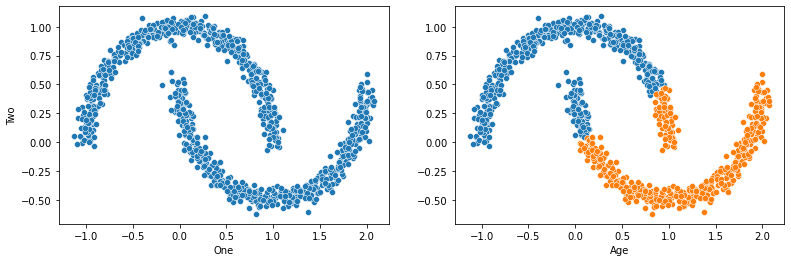

In [84]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(data=df,y='Two',x='One')
ax2=fig.add_subplot(1,2,2)
for i in range(k):
    ax2=sns.scatterplot(x=X[y_pred==i,0],y=X[y_pred==i,1])
ax2.set_xlabel('Age')

In [93]:
score = silhouette_score(scaled_df, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.500


Con hierarchy aggrupation

In [91]:
agg_cluster = AgglomerativeClustering(n_clusters=2,linkage='single')
y_pred = agg_cluster.fit_predict(scaled_df)

Text(0.5, 0, 'Age')

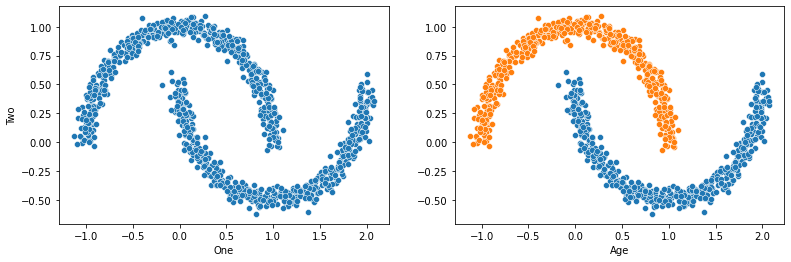

In [92]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(data=df,y='Two',x='One')
ax2=fig.add_subplot(1,2,2)
for i in range(k):
    ax2=sns.scatterplot(x=X[y_pred==i,0],y=X[y_pred==i,1])
ax2.set_xlabel('Age')

In [96]:
score = silhouette_score(scaled_df, agg_cluster.labels_)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.391


DBSCAN

In [87]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_pred = dbscan.fit_predict(scaled_df)

Text(0.5, 0, 'Age')

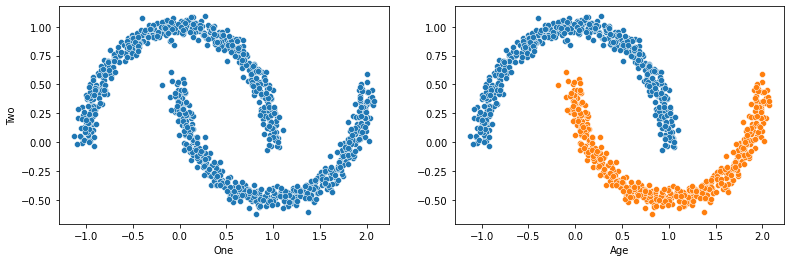

In [88]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(data=df,y='Two',x='One')
ax2=fig.add_subplot(1,2,2)
for i in range(k):
    ax2=sns.scatterplot(x=X[y_pred==i,0],y=X[y_pred==i,1])
ax2.set_xlabel('Age')

In [99]:
score = silhouette_score(scaled_df, dbscan.labels_)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.391


# ejercicio 2
Considere el Dataset de imágenes llamado *Olivetti Faces*, el cual se encuentra en scikit-learn (documentación [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html)). Se le solicita entrenar un modelo que sea capaz de identificar a una persona a partir de su foto.

In [100]:
data_olivetti=sklearn.datasets.fetch_olivetti_faces()
data_olivetti.data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/matiasinostrozacifuentes/scikit_learn_data


array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [101]:
X=data_olivetti.data
X.shape

(400, 4096)

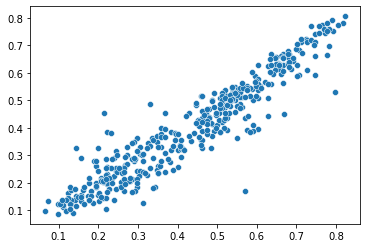

In [104]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(y=X[:,0],x=X[:,1])

los modelos

Kmeans

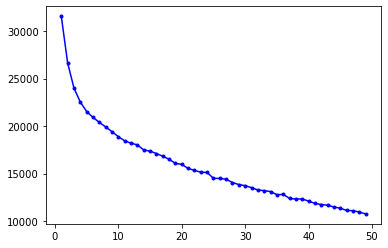

In [211]:
score = []
k_clusters = range(1,50)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    

plt.plot(k_clusters, score,'b.-')

In [110]:
k = 40
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [209]:
kmeans.predict(X)

array([39, 25, 39,  4,  5,  4, 39,  4, 39, 26, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10,  2,  2,  2,  3,  3,  3,  9,  9,  5,  5, 13, 13,  3,  5,
        5,  4,  5, 13, 13, 13,  6,  2,  2,  6,  9,  9,  6,  9,  9,  9,  5,
        5,  5, 17, 17, 17, 17, 17, 17, 17, 16, 16, 30,  9, 16, 30, 16, 16,
       30, 18, 27, 27, 27, 25, 27, 27, 25, 27,  4, 25, 33, 33, 33,  6,  6,
        6,  6,  6, 33,  5, 38, 38, 25, 25, 38, 38, 38, 38,  4, 27,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 26, 29, 29, 29, 29,  4, 29, 26, 26,
       26, 13, 13,  6,  6,  5, 13,  4,  4,  5,  6, 34, 34, 34, 34, 34, 34,
       34, 34, 34, 34, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,  7, 39, 39,
       39, 39,  7, 39,  4, 39, 39, 37, 37,  2,  2, 37, 36, 36, 37, 36, 36,
        5,  5,  6,  5,  5,  5,  5,  5,  5,  5, 22, 22, 22, 16, 16, 22, 16,
       16, 16, 22, 13, 13, 13, 13, 35, 13, 35, 35, 35, 13, 33,  0,  0, 11,
       11, 11,  9,  0, 11,  0, 15, 15, 15, 15, 15, 31, 15, 15, 15, 15,  5,
        5,  2,  6,  2,  6

In [111]:
score = silhouette_score(X, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.164


Text(0.5, 0, 'Age')

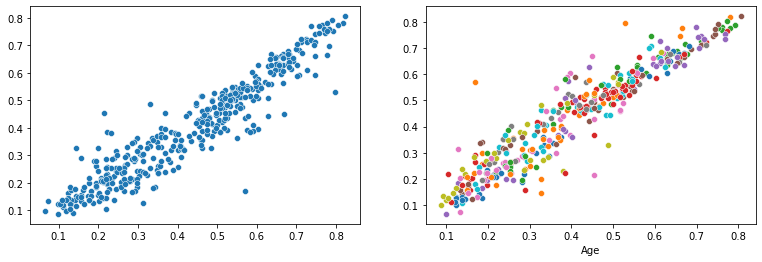

In [112]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(y=X[:,0],x=X[:,1])
ax2=fig.add_subplot(1,2,2)
for i in range(k):
    ax2=sns.scatterplot(x=X[y_pred==i,0],y=X[y_pred==i,1])
ax2.set_xlabel('Age')

Con hierarchy aggrupation

In [147]:
agg_cluster = AgglomerativeClustering(n_clusters=40,linkage='single')
y_pred = agg_cluster.fit_predict(X)

In [148]:
y_pred

array([ 1, 26,  1,  1, 25,  1,  1, 34,  1, 39,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 38, 38,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2, 11,  2,  2, 11, 23,  2,
       11, 31, 13, 13,  6, 36,  6,  6,  3,  6, 35,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 17, 17,  1,  1,  1,  1,  1,  6,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 20,  1,  1,
       29, 29, 20, 12,  1,  1,  1, 33, 33,  1,  1, 33,  7,  7, 32,  7,  7,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1, 19,  1, 19, 19, 19,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Text(0.5, 0, 'Age')

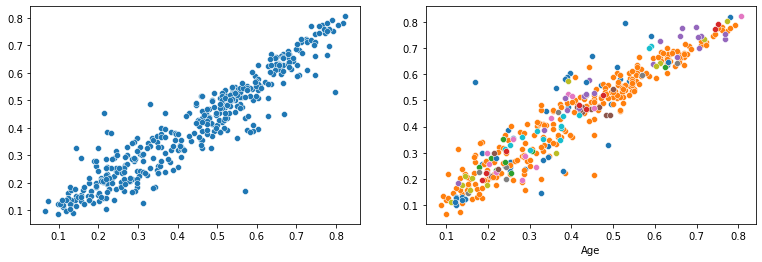

In [119]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(y=X[:,0],x=X[:,1])
ax2=fig.add_subplot(1,2,2)
for i in range(k):
    ax2=sns.scatterplot(x=X[y_pred==i,0],y=X[y_pred==i,1])
ax2.set_xlabel('Age')

In [120]:
score = silhouette_score(X, agg_cluster.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: -0.012


DBSCAN

In [162]:
X.shape

(400, 4096)

In [163]:
y_pred=[]

In [208]:
dbscan = DBSCAN(eps=7.75, min_samples=1)
y_pred = dbscan.fit_predict(X)
y_pred

array([ 0,  1,  0,  0,  2,  3,  0,  4,  0,  5,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  6,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  7,  7,  7,  7,  7,  7,  7,  8,  8,  9, 10,  8,  9, 11,  8,
        9, 12, 13, 13, 14, 15, 14, 14, 16, 14, 17, 16,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 18, 18,  0,  0,  0,  0, 19, 14, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  0,  0,
       23, 23, 22, 24,  0,  0,  0, 25, 25, 26, 26, 25, 27, 27, 28, 27, 27,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 29, 29, 29, 20, 20, 29, 20,
       20, 20, 29,  0,  0,  0, 30, 31, 30, 31, 31, 31,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [203]:
dbscan.labels_

array([ 0,  1,  0,  0,  2,  3,  0,  4,  0,  5,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  6,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  7,  7,  7,  7,  7,  7,  7,  8,  8,  9, 10,  8,  9, 11,  8,
        9, 12, 13, 13, 14, 15, 14, 14, 16, 14, 17, 16,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 18, 18,  0,  0,  0,  0, 19, 14, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 22,  0,  0,
       23, 23, 22, 24,  0,  0,  0, 25, 25, 26, 26, 25, 27, 27, 28, 27, 27,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 29, 29, 29, 20, 20, 29, 20,
       20, 20, 29,  0,  0,  0, 30, 31, 30, 31, 31, 31,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [204]:
count=0
for i in range(0, len(y_pred)):
    if y_pred[i]==-1:
        count=count+1
print(count)

0


Text(0.5, 0, 'Age')

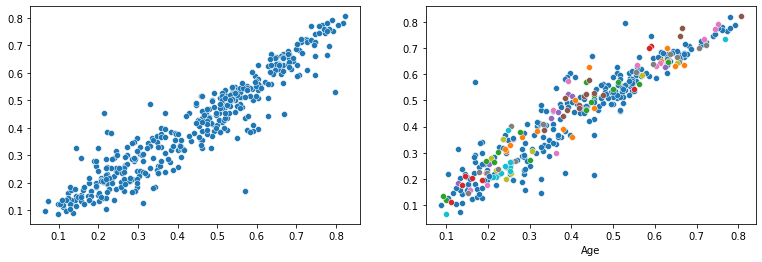

In [205]:
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1=sns.scatterplot(y=X[:,0],x=X[:,1])
ax2=fig.add_subplot(1,2,2)
for i in range(k):
    ax2=sns.scatterplot(x=X[y_pred==i,0],y=X[y_pred==i,1])
ax2.set_xlabel('Age')

In [206]:
score = silhouette_score(X, dbscan.labels_)
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.020
